An investment firm is attempting to invest in private companies with a valuation of at least $1 billion. These are often known as "unicorns." Our client wants to develop a better understanding of unicorns, with the hope they can be early investors in future highly successful companies.

The investor has asked us to provide them with the following data:

1. Companies in the hardware industry based in Beijing, San Francisco, and London
2. Companies in the artificial intelligence industry based in London
3. A list of the top 20 countries sorted by sum of company valuations in each country, excluding United States, China, India, and United Kingdom
4. A global valuation map of all countries except United States, China, India, and United Kingdo

They are also particularly interested in the investment strategies of the three top unicorn investors: Sequoia Capital, Tiger Global Management, and Accel.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import datetime as dt
import plotly.express as px

In [2]:
# Load the dataset provided into a DataFrame.
companies = pd.read_csv("C:/Users/0&1/OneDrive/Documents/Unicorn_Companies.csv")

In [3]:
#Data exploration
# Display the first 10 rows of the data.
companies.head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year_Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/2017,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/2012,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/2018,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/2014,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/2011,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,$40B,1/8/2018,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,$40B,5/2/2019,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,$39B,12/30/2014,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,$38B,12/20/2017,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,$38B,2/5/2019,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates..."


-The "Date Joined" column represents when the company became a "unicorn," reaching one billion dollars in valuation.

-The "Select Investors" column represents the top investors in the company.

In [4]:
#Identify the number of rows and columns
companies.shape

(1074, 10)

In [5]:
companies.size

10740

-The size of the dataset is 10740. This means that there are 10740 values in total across the whole dataset.

-The shape of the dataset is (1074, 10). The first number, 1074, represents the number of rows.

-The second number, 10, represents the number of columns. According to this dataset, there are 1074 unicorn companies as of March 2022, and this dataset also shows 10 aspects of each company.

In [6]:
# Check for duplicates.
companies.drop_duplicates().shape

(1074, 10)

In [7]:
# Display the data types of the columns.
companies.dtypes

Company             object
Valuation           object
Date Joined         object
Industry            object
City                object
Country/Region      object
Continent           object
Year_Founded         int64
Funding             object
Select Investors    object
dtype: object

-The data type of the Year Founded column is int64.

-The rest of the columns have the data type object.

In [8]:
# Sort `companies` and display the first 10 rows of the resulting DataFrame.
# To arrange the data from latest to earliest `Year Founded`
companies.sort_values(by="Year_Founded", ascending=False).head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year_Founded,Funding,Select Investors
782,Phantom,$1B,1/31/2022,Fintech,San Francisco,United States,North America,2021,$118M,"Paradigm, Andreessen Horowitz, Jump Capital"
714,Yidian Zixun,$1B,10/17/2017,Mobile & telecommunications,Beijing,China,Asia,2021,$151M,"Phoenix New Media, Tianjin Haihe Industry Fund"
822,GlobalBees,$1B,12/28/2021,E-commerce & direct-to-consumer,New Delhi,India,Asia,2021,$185M,"Chiratae Ventures, SoftBank Group, Trifecta Ca..."
554,ClickHouse,$2B,10/28/2021,Data management & analytics,Portola Valley,United States,North America,2021,$300M,"Lightspeed Venture Partners, Almaz Capital Par..."
952,LayerZero Labs,$1B,3/30/2022,Internet software & services,New York,United States,North America,2021,$143M,"Andreessen Horowitz, FTX Ventures, Tiger Globa..."
314,Flink Food,$3B,12/1/2021,E-commerce & direct-to-consumer,Berlin,Germany,Europe,2021,$1B,"Mubadala Capital, Bond, Prosus Ventures"
864,Aptos,$1B,3/15/2022,Internet software & services,Palo Alto,United States,North America,2021,$200M,"Andreessen Horowitz, Coinbase Ventures, Tiger ..."
238,Yuga Labs,$4B,3/22/2022,Fintech,Miami,United States,North America,2021,$450M,"Andreessen Horowitz, Thrive Capital, Sound Ven..."
775,Jokr,$1B,12/2/2021,E-commerce & direct-to-consumer,New York,United States,North America,2021,$430M,"GGV Capital, Tiger Global Management, Greycroft"
967,Mensa Brands,$1B,11/16/2021,Other,Bengaluru,India,Asia,2021,$218M,"Accel, Falcon Edge Capital, Norwest Venture Pa..."


- These 10 rows correspond to unicorn companies that were founded in 2021.

- These 10 companies were founded in different parts of the world and belong to different industries.

- Many of these 10 companies were founded in the United States and belong to "Fintech," "E-commerce & direct-to-consumer", and "Internet software & services" industries.

In [9]:
#Determine the number of companies founded each year
# Display each unique year that occurs in the dataset
# along with the number of companies that were founded in each unique year.
companies["Year_Founded"].value_counts().sort_values(ascending=False)

2015    155
2016    110
2014    109
2012     95
2013     87
2011     82
2017     74
2018     61
2019     45
2010     40
2009     34
2008     27
2020     25
2007     24
2006     15
2005     14
2021     11
2000     11
2001      9
1999      8
2004      8
2003      8
1998      5
2002      4
1994      2
1995      2
1992      1
1984      1
1990      1
1991      1
1979      1
1993      1
1996      1
1997      1
1919      1
Name: Year_Founded, dtype: int64

- 2015 has the highest count. This indicates that 2015 is the year when the largest number of companies in this dataset were founded.


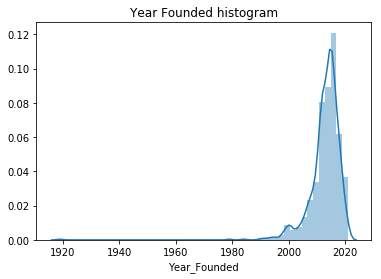

In [10]:
#Plot a histogram of the Year Founded feature.
sns.distplot(companies.Year_Founded)
plt.title('Year Founded histogram');

Given that the Date Joined columns currently has the data type object, if we wanted to compare when one company joined unicorn status to when another company joined, it would not be possible to achieve this meaningfully, as is.
If this column were transformed so that it had a datetime data type instead, then it could be used to meaningfully compare Date Joined of one company to another.

In [11]:
#Convert the Date Joined column to datetime
# Convert `Date Joined` column to datetime.
# Update the column with the converted values.
companies["Date Joined"] = pd.to_datetime(companies["Date Joined"])

In [12]:
# Display the data types of the columns in `companies`
# to confirm that the update actually took place
companies.dtypes

Company                     object
Valuation                   object
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country/Region              object
Continent                   object
Year_Founded                 int64
Funding                     object
Select Investors            object
dtype: object

Now that the Date Joined column is in datetime format, we extract the month name from each value in Date Joined.
This helps obtain the names of the months when companies attained unicorn status.

In [13]:
#Create a Month Joined column
# Obtain the names of the months when companies gained unicorn status.
# Use the result to create a `Month Joined` column.
companies["Month Joined"] = companies["Date Joined"].dt.month_name()

In [14]:
# Display the first few rows of `companies`
# to confirm that the new column did get added.
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year_Founded,Funding,Select Investors,Month Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",April
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",December
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",July
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",January
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",December


Given that the Date Joined column is in datetime format, extract the year component from Date Joined and subtract the Year Founded column from it.
This difference in years represents how many years it took for companies to reach unicorn status.

In [15]:
#Create a Years To Join column
## Determine how many years it took for companies to reach unicorn status.
# Use the result to create a `Years To Join` column.
companies["Years To Join"] = companies["Date Joined"].dt.year - companies["Year_Founded"]

In [16]:
# Display the first few rows of `companies`
# to confirm that the new column did get added.
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year_Founded,Funding,Select Investors,Month Joined,Years To Join
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",April,5
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",December,10
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",July,10
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",January,4
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",December,6


Get more insight on the year 2021, as that is the most recent year for which there is data available. 
Trends that took place in 2021 might be similar to trends that'll take place in 2022, 2023 and 2024.

In [17]:
# Gain more insight on 2021
# Filter dataset by a year of my interest (in terms of when companies reached unicorn status).
# Save the resulting subset in a new variable.
companies_2021 = companies[companies["Date Joined"].dt.year == 2021]

In [18]:
# Display the first few rows of the subset to confirm that it was created
companies_2021.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year_Founded,Funding,Select Investors,Month Joined,Years To Join
12,FTX,$32B,2021-07-20,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",July,3
16,J&T Express,$20B,2021-04-07,"Supply chain, logistics, & delivery",Jakarta,Indonesia,Asia,2015,$5B,"Hillhouse Capital Management, Boyu Capital, Se...",April,6
24,Blockchain.com,$14B,2021-02-17,Fintech,London,United Kingdom,Europe,2011,$490M,"Lightspeed Venture Partners, Google Ventures, ...",February,10
27,OpenSea,$13B,2021-07-20,E-commerce & direct-to-consumer,New York,United States,North America,2017,$427M,"Andreessen Horowitz, Thirty Five Ventures, Sou...",July,4
34,Getir,$12B,2021-03-26,E-commerce & direct-to-consumer,Istanbul,Turkey,Europe,2015,$2B,"Tiger Global Management, Sequoia Capital, Revo...",March,6


We take a subset consisted of companies that joined in 2021, create a column that corresponds to week joined, group by week, and count the number of companies that joined per week. This allows the observation of trends over the weeks of 2021.

In [19]:
#Observe trends over time
# Step 1. We take the subset that we defined for 2021. 
#         Insert a column that contains the time interval that each data point belongs to, as needed.
# Step 2. Group by the time interval.
#         Aggregate by counting companies that joined per interval of 2021.
#         Save the resulting DataFrame in a new variable.

# Insert a `Week Joined` column into `companies_2021.`
companies_2021.insert(3, "Week Joined", companies_2021["Date Joined"].dt.strftime('%Y-W%V'), True)

In [20]:
# Group `companies_2021` by `Week Joined`. 
# Aggregate by counting companies that joined per week of 2021.
# Save the resulting DataFrame in a new variable.
companies_by_week_2021 = companies_2021.groupby(by="Week Joined")["Company"].count().reset_index().rename(columns={"Company":"Company Count"})

In [21]:
# Display the first few rows of the new DataFrame to confirm that it was created.
companies_by_week_2021.head()

,Week Joined,Company Count
0,2021-W01,12
1,2021-W02,9
2,2021-W03,5
3,2021-W04,8
4,2021-W05,4


We structure the data to observe trends in the average valuation of companies from 2020 to 2021.


In [23]:
# Filter by the additional year to create a subset that consists of companies that joined in that year.
companies_2020 = companies[companies["Date Joined"].dt.year == 2020]

In [24]:
# Concatenate the new subset with the subset that you defined previously.
companies_2020_2021 = pd.concat([companies_2020, companies_2021.drop(columns="Week Joined")])

In [25]:
# Add `Quarter Joined` column to `companies_2021`.
companies_2020_2021["Quarter Joined"] = companies_2020_2021["Date Joined"].dt.to_period('Q').dt.strftime('%Y-Q%q')

In [26]:
# Convert the `Valuation` column to numeric by removing `$` and `B` and casting each value to data type `float`.
companies_2020_2021["Valuation"] =  companies_2020_2021["Valuation"].str.strip("$B").astype(float)

In [27]:
# Group `companies_2020_2021` by `Quarter Joined`, 
# Aggregate by computing average `Funding` of companies that joined per quarter of each year.
# Save the resulting DataFrame in a new variable.
companies_by_quarter_2020_2021 = companies_2020_2021.groupby(by="Quarter Joined")["Valuation"].mean().reset_index().rename(columns={"Valuation":"Average Valuation"})

In [28]:
# Display the first few rows of the new DataFrame to confirm that it was created.
companies_by_quarter_2020_2021.head()

,Quarter Joined,Average Valuation
0,2020-Q1,3.444444
1,2020-Q2,3.777778
2,2020-Q3,3.896552
3,2020-Q4,3.697674
4,2021-Q1,2.750000


In [29]:
#Visualize the time it took companies to become unicorns
# Define a list that contains months in chronological order.
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", 
               "December"]
# Print out the list to confirm it is correct.
print(month_order)

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


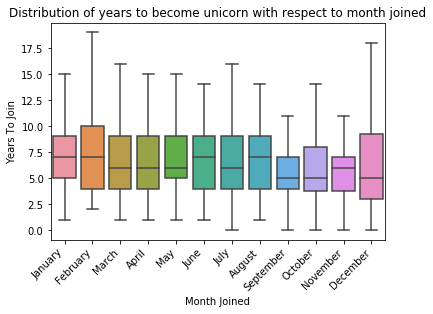

In [30]:
# Create the box plot to visualize the distribution of how long it took companies to become unicorns, with respect to the month they joined.
# Plot the data from the `companies` DataFrame.
sns.boxplot(x=companies['Month Joined'], 
            y=companies['Years To Join'], 
            order=month_order, 
            showfliers=False)

# Set the title of the plot.
plt.title('Distribution of years to become unicorn with respect to month joined')

# Rotate labels on the x-axis as a way to avoid overlap in the positions of the text.
plt.xticks(rotation=45, horizontalalignment='right')

# Display the plot.
plt.show()

In the preceding box plot, the median value for Years To Join is different for each month.
Also, the median Years To Join is lower for the months of September and October. 
This could indicate that companies that reached unicorn status in early fall took less time to reach $1 billion valuation. 
This is because the number of companies is relatively close/consistent for each month. 
If that were not the case, it would be misleading to compare the median values from the box plots between months.

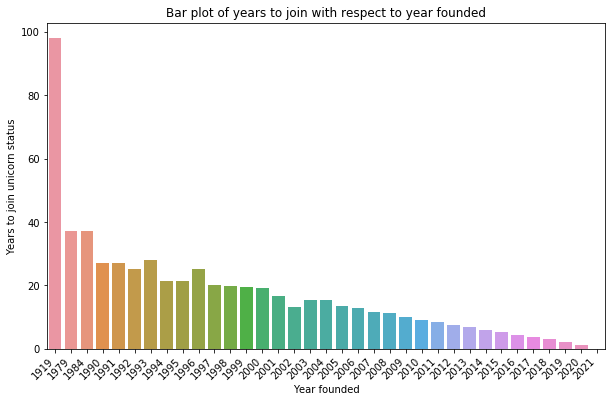

In [31]:
#Results and evaluation
#Visualize the time it took companies to reach unicorn status
#Set the size of the plot.
plt.figure(figsize=(10,6))

# Create bar plot to visualize the average number of years it took companies to reach unicorn status 
# with respect to when they were founded.
# Plot data from the `companies` DataFrame.
sns.barplot(x=companies["Year_Founded"], y=companies["Years To Join"], ci=False)

# Set title
plt.title("Bar plot of years to join with respect to year founded")

# Set x-axis label
plt.xlabel("Year founded")

# Set y-axis label
plt.ylabel("Years to join unicorn status")

# Rotate the labels on the x-axis as a way to avoid overlap in the positions of the text. 
plt.xticks(rotation=45, horizontalalignment='right')

# Display the plot.
plt.show()

There appears to be a trend wherein companies that were founded later took less time to reach unicorn status, on average.
This is a bias that is common in time data—because companies founded in later years have been around for less time. 
Therefore, there is less time to collect data on such companies compared to companies founded in earlier years.

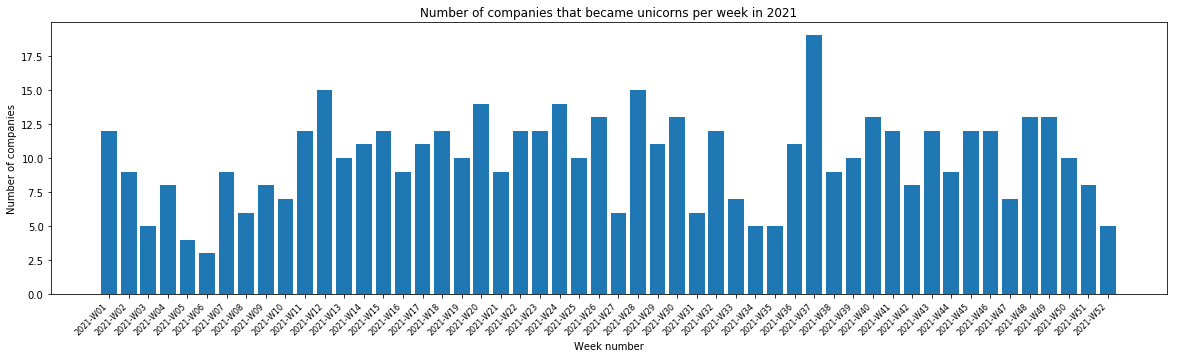

In [32]:
#Visualize the number of companies that joined per interval
# Set the size of the plot.
plt.figure(figsize = (20, 5))

# Create bar plot to visualize number of companies that joined per interval for the year of interest.
plt.bar(x=companies_by_week_2021['Week Joined'],height=companies_by_week_2021['Company Count'])
plt.plot()

# Set the x-axis label.
plt.xlabel("Week number")

# Set the y-axis label.
plt.ylabel("Number of companies")

# Set the title.
plt.title("Number of companies that became unicorns per week in 2021")

# Rotate the labels on the x-axis as a way to avoid overlap in the positions of the text.
plt.xticks(rotation = 45, horizontalalignment='right', fontsize=8)

# Display the plot.
plt.show()

Observations from a bar plot of the number of companies that became unicorns per week in 2021:

- The number of companies that joined unicorn status fluctuated over the weeks of 2021, with a trend of decline followed by increase occurring periodically.
- The highest number of companies reached $1 billion valuation in Week 37 of 2021, which corresponds to the third week of September 2021.
- The weeks in 2021 with the next highest number of companies becoming unicorns are Week 12 (which corresponds to the fourth week of March) and Week 28 (which corresponds to the third week of July).

In [33]:
#Visualize the average valuation over the quarters
# Using slicing, extract the year component and the time interval that you specified, 
# and save them by adding two new columns into the subset.
companies_by_quarter_2020_2021['Quarter Number'] = companies_by_quarter_2020_2021['Quarter Joined'].str[-2:]
companies_by_quarter_2020_2021['Year_Joined'] = companies_by_quarter_2020_2021['Quarter Joined'].str[:4]

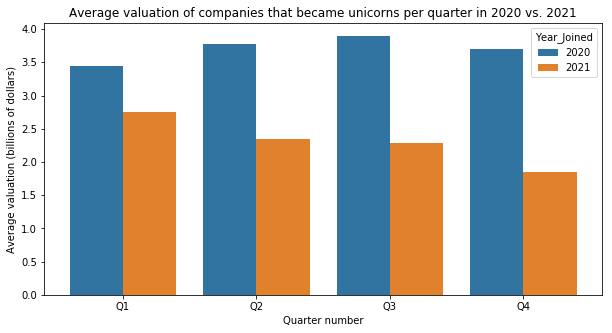

In [34]:
# Set the size of the plot.
plt.figure(figsize = (10, 5))

# Create a grouped bar plot.
sns.barplot(x=companies_by_quarter_2020_2021['Quarter Number'],
            y=companies_by_quarter_2020_2021['Average Valuation'],
            hue=companies_by_quarter_2020_2021['Year_Joined'])
plt.plot()

# Set the x-axis label.
plt.xlabel("Quarter number")

# Set the y-axis label.
plt.ylabel("Average valuation (billions of dollars)")

# Set the title.
plt.title("Average valuation of companies that became unicorns per quarter in 2020 vs. 2021")

# Display the plot.
plt.show()

Observations from a grouped bar plot of average valuation of companies that became unicorns per quarter in 2020 vs. 2021:
- In each quarter, the average valuation of companies that joined unicorn status was higher in 2020 than in 2021.
- In 2020, Q3 was the quarter with the highest average valuation of companies that reached unicorn status, and there was a trend of increase from Q1 to Q2 and from Q2 to Q3.
- In 2021, Q1 was the quarter with the highest average valuation of companies that reached unicorn status, and there was a trend of decrease across the quarters.

# sample

In [37]:
#Create a Year Joined column
# Step 1: Use .dt.year to extract year component from Date Joined column
# Step 2: Add the result as a new column named Year Joined to the DataFrame
companies["Year Joined"] = companies["Date Joined"].dt.year

In [39]:
# Use .head() to confirm that the new column did get added
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year_Founded,Funding,Select Investors,Month Joined,Years To Join,Year Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",April,5,2017
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",December,10,2012
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",July,10,2018
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",January,4,2014
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",December,6,2011


In [40]:
#Results and evaluation
#Take a sample of the data
# Sample the data
companies_sample = companies.sample(n = 50, random_state = 42)

In [41]:
#Visualize the longest time it took companies to reach unicorn status for each industry represented in the sample.
# Prepare data for plotting
# Create new `years_till_unicorn` column
companies_sample["years_till_unicorn"] = companies_sample["Year Joined"] - companies_sample["Year_Founded"]

In [42]:
# Group the data by `Industry`. For each industry, get the max value in the `years_till_unicorn` column.
grouped = (companies_sample[["Industry", "years_till_unicorn"]]
           .groupby("Industry")
           .max()
           .sort_values(by="years_till_unicorn")
          )
grouped

,years_till_unicorn
Industry,
Consumer & retail,1
Auto & transportation,2
Artificial intelligence,5
Data management & analytics,8
Mobile & telecommunications,9
"Supply chain, logistics, & delivery",12
Internet software & services,13
Other,15
E-commerce & direct-to-consumer,18


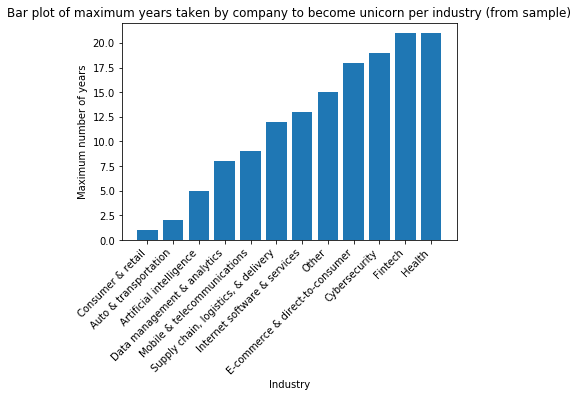

In [43]:
# Create bar plot
# with Industry column as the categories of the bars
# and the difference in years between Year Joined column and Year Founded column as the heights of the bars
plt.bar(grouped.index, grouped["years_till_unicorn"])
# Set title
plt.title("Bar plot of maximum years taken by company to become unicorn per industry (from sample)")
# Set x-axis label
plt.xlabel("Industry")
# Set y-axis label
plt.ylabel("Maximum number of years")
# Rotate labels on the x-axis as a way to avoid overlap in the positions of the text
plt.xticks(rotation=45, horizontalalignment='right')
# Display the plot
plt.show()

This bar plot shows that for this sample of unicorn companies, the largest value for maximum time taken to become a unicorn occurred in the Heath and Fintech industries, while the smallest value occurred in the Consumer & Retail industry.

In [44]:
#Visualize unicorn companies' maximum valuation for each industry represented in the sample.
# Create a column representing company valuation as numeric data
# Create new column
companies_sample['valuation_billions'] = companies_sample['Valuation']
# Remove the '$' from each value
companies_sample['valuation_billions'] = companies_sample['valuation_billions'].str.replace('$', '')
# Remove the 'B' from each value
companies_sample['valuation_billions'] = companies_sample['valuation_billions'].str.replace('B', '')
# Convert column to type int
companies_sample['valuation_billions'] = companies_sample['valuation_billions'].astype('int')
companies_sample.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year_Founded,Funding,Select Investors,Month Joined,Years To Join,Year Joined,years_till_unicorn,valuation_billions
542,Aiven,$2B,2021-10-18,Internet software & services,Helsinki,Finland,Europe,2016,$210M,"Institutional Venture Partners, Atomico, Early...",October,5,2021,5,2
370,Jusfoun Big Data,$2B,2018-07-09,Data management & analytics,Beijing,China,Asia,2010,$137M,"Boxin Capital, DT Capital Partners, IDG Capital",July,8,2018,8,2
307,Innovaccer,$3B,2021-02-19,Health,San Francisco,United States,North America,2014,$379M,"M12, WestBridge Capital, Lightspeed Venture Pa...",February,7,2021,7,3
493,Algolia,$2B,2021-07-28,Internet software & services,San Francisco,United States,North America,2012,$334M,"Accel, Alven Capital, Storm Ventures",July,9,2021,9,2
350,SouChe Holdings,$3B,2017-11-01,E-commerce & direct-to-consumer,Hangzhou,China,Asia,2012,$1B,"Morningside Ventures, Warburg Pincus, CreditEa...",November,5,2017,5,3


In [45]:
# Prepare data for modeling
grouped = (companies_sample[["Industry", "valuation_billions"]]
           .groupby("Industry")
           .max()
           .sort_values(by="valuation_billions")
          )
grouped

,valuation_billions
Industry,
Auto & transportation,1
Consumer & retail,1
Other,2
"Supply chain, logistics, & delivery",2
Cybersecurity,3
Health,3
Data management & analytics,4
E-commerce & direct-to-consumer,4
Internet software & services,5


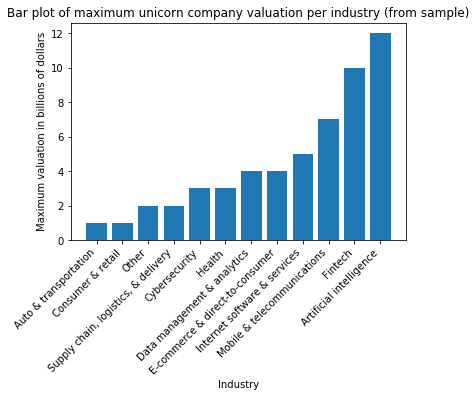

In [46]:
# Create bar plot
# with Industry column as the categories of the bars
# and new valuation column as the heights of the bars
plt.bar(grouped.index, grouped["valuation_billions"])
# Set title
plt.title("Bar plot of maximum unicorn company valuation per industry (from sample)")
# Set x-axis label
plt.xlabel("Industry")
# Set y-axis label
plt.ylabel("Maximum valuation in billions of dollars")
# Rotate labels on the x-axis as a way to avoid overlap in the positions of the text 
plt.xticks(rotation=45, horizontalalignment='right')
# Display the plot
plt.show()

This bar plot shows that for this sample of unicorn companies, the highest maximum valuation occurred in the Artificial Intelligence industry, while the lowest maximum valuation occurred in the Auto & transportation, and Consumer & retail industries.